# Data Analysis Techniques for Linguistic Research

Both techniques covered in this tutorial (*k*-means clustering and exploratory factor analysis) are reduction techniques, such that the dimensions of the data set are reduced. *k*-means clustering makes groups out of observations of data (rows), whereas exploratory factor analysis makes groups out of columns in the data set.

1. *K*-means Clustering - vowel categories ([Sandoval et al., 2013](https://asa.scitation.org/doi/10.1121/1.4826150)), language profiles ([Rysiewicz, 2008](https://onlinelibrary.wiley.com/doi/10.1111/j.1540-4781.2008.00688.x))

*K*-means clustering is an unsupervised machine learning technique, meaning that the data set is submitted to an algorithm that groups unlabeled rows of data. Unlabeled data means that there is no 'outcome' associated with the data set. An example of a labeled data set could be data obtained from a perceptual discrimination task, where each row of data is labeled as 'hit' or 'miss'. Unlabeled data could take the form of gradient measures of production, such as VOT. Some linguistic applications of *k*-means clustering includes classifying vowel production and grouping participants according to linguistic profiles.

2. Exploratory Factor Analysis - matched guise ([D'Onofrio, 2019](https://onlinelibrary.wiley.com/doi/abs/10.1111/josl.12368); [Weatherholtz et al., 2014](https://www.cambridge.org/core/journals/language-variation-and-change/article/sociallymediated-syntactic-alignment/08A99AE8BA59E60F5ACBB6FECB49DB48))

Exploratory Factor Analysis (EFA) is a statistical method used to describe latent factors by associating certain variables together. Latent factors are factors that are not directly measureable, such as solidarity and power, but that affect the outcome of measured variables. It is helpful to perform EFA on matched guise data, which often contains 10+ feature sets, in order to make the data more interpretable and to reduce the number of variables for future analysis (i.e. regression models). 

An extremely useful Python package that will be used in this tutorial is `scikit-learn`. This package is often used in machine learning and statistical techniques.

Import the following libraries:

In [1]:
import pandas as pd # allows you to open .csv files into Python

# libraries for plotting
import matplotlib.pyplot as plt # allows you to plot in Python
# allows for plotting inline
%matplotlib inline

# k-means clustering
from sklearn.cluster import KMeans # KMeans algorithm
from sklearn.preprocessing import StandardScaler # z-scores data set, where mean = 0, SD = 1

# factor analysis
import factor_analyzer as fa # factor analysis algorithm

If you need to install the `factor_analyzer` package, open the DataHub terminal and type `pip install factor_analyzer`.

### 1. *K*-means Clustering

As mentioned earlier, *k*-means clustering is a simple method for sorting unlabeled data. The technique works with *k* number of centroids and assigns every data point in the data set to the nearest centroid. The centroids then shift to take the place of the new centroid of the generated cluster, then every data point is once again assigned to the cluster of the nearest centroid. The process is iterative and repeats until the sum of squared distances within clusters is minimized. 

![k-means animation](https://media.giphy.com/media/12vVAGkaqHUqCQ/giphy.gif)

(Source: https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/)

#### Parameters of the *k*-means algorithm

Common parameters for the algorithm include:

- `init`; determines how the initial cluster centroids are chosen, `"k-means++"` is the default and chooses the centroids 'smartly', speeding up the process
- `n_clusters`; the number of cluster centroids, can be selected based on domain knowledge, or by best-fit methods (described below)
- `n_init`; the number of iterations to run through with different centroid starting points, default is 10

See <https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html> for more details.

#### Determining the number of clusters

The number of clusters can either by determined by the researcher, based on domain knowledge, or can be decided via a variety of methods. Here, the "elbow method" (via a Scree Plot) will be shown used to select a value for `n_clusters`.

#### Practice
For this tutorial, the dataset `blp_scores.csv` can be used for practice. The data set contains raw responses to the [Bilingual Language Profile (BLP) survey](https://sites.la.utexas.edu/bilingual/) (Birdsong et al., 2012), with information from two separate languages about the following four categories:

- Attitudes towards the language
- History with the language
- Proficiency in the language
- Use of the language

We can use *k*-means clustering to group participants according to their similarity of responses. 

Import the dataset and then run the following code chunk to calculate the sum of squared distances produced by a range of *k*-values, 1-10:

In [2]:
# import .csv as dataframe
blp = pd.read_csv("data/blp_scores.csv")
blp.head()

,Participant,Attitude_Spanish,Attitude_Catalan,History_Spanish,History_Catalan,Proficiency_Spanish,Proficiency_Catalan,Use_Spanish,Use_Catalan
0,p1,20,24,86,96,23,23,14,35
1,p2,20,24,87,97,18,24,1,44
2,p3,20,24,96,115,19,24,10,36
3,p4,12,12,81,120,19,24,17,33
4,p5,22,23,104,84,19,24,32,18


Next, we can normalize the values by dividing each column by the total possible points.

- Attitude - 24 points max
- History - 180 points
- Proficiency - 24 points max
- Use - 50 points max

In [3]:
blp['Attitude_Spanish'] = blp['Attitude_Spanish']/24
blp['Attitude_Catalan'] = blp['Attitude_Catalan']/24
blp['History_Spanish'] = blp['History_Spanish']/180
blp['History_Catalan'] = blp['History_Catalan']/180
blp['Proficiency_Spanish'] = blp['Proficiency_Spanish']/24
blp['Proficiency_Catalan'] = blp['Proficiency_Catalan']/24
blp['Use_Spanish'] = blp['Use_Spanish']/50
blp['Use_Catalan'] = blp['Use_Catalan']/50
blp.head()

,Participant,Attitude_Spanish,Attitude_Catalan,History_Spanish,History_Catalan,Proficiency_Spanish,Proficiency_Catalan,Use_Spanish,Use_Catalan
0,p1,0.833333,1.000000,0.477778,0.533333,0.958333,0.958333,0.28,0.70
1,p2,0.833333,1.000000,0.483333,0.538889,0.750000,1.000000,0.02,0.88
2,p3,0.833333,1.000000,0.533333,0.638889,0.791667,1.000000,0.20,0.72
3,p4,0.500000,0.500000,0.450000,0.666667,0.791667,1.000000,0.34,0.66
4,p5,0.916667,0.958333,0.577778,0.466667,0.791667,1.000000,0.64,0.36


Even though the data is now on a common scale (0-1), the data still needs to be standardized with a z-score transform, where the mean is 0 and the variance is 1.

In [4]:
# drop the participant column from data set
blp_new = blp.drop('Participant', 1)

# perform the z-score transform
blp_std = StandardScaler().fit_transform(blp_new)

The best value of *k* can be determined with the elbow method, where the sum of squared distances is calculated for each value of *k* in a range from 1 to 10.

In [5]:
# calculate sum of squared distances over range of k-values
Sum_of_squared_distances = []
K = range(1,10 + 1)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(blp_std) 
    Sum_of_squared_distances.append(km.inertia_)

Next, plot the relationship between the *k*-value and its associated sum of squared distances. Because the sum of squared distance will be at the lowest when the *k*-value is equal to the number of points in the data set, the *k*-value should not be selected to minimize the sum of squared distance. However, the *k*-value on the Scree plot below at the "elbow" of the curve is the value that will minimize the sum of squared distance while still producing a meaningful clustering.

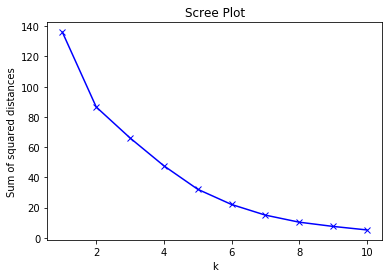

In [6]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Scree Plot')
plt.show()

From the plot above, the best value of k for this data set is 2. Now, this value can be plugged into the algorithm and the data can be clustered.

In [7]:
# set the parameters for the k-means algorithm
# n_init of 12 improves the accuracy a little
k_means = KMeans(init = "k-means++", n_clusters = 2, n_init = 12)

# fit the algorithm to the dataframe
k_means.fit(blp_std)

# create an array called `k_means_labels` which contains the cluster label for each row in the dataframe
k_means_labels = k_means.labels_
k_means_labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0])

Now, the array of cluster labels can be attached to the original dataframe for future reference.

In [8]:
blp.insert(1, 'Cluster Labels', k_means_labels)
blp.head()

,Participant,Cluster Labels,Attitude_Spanish,Attitude_Catalan,History_Spanish,History_Catalan,Proficiency_Spanish,Proficiency_Catalan,Use_Spanish,Use_Catalan
0,p1,1,0.833333,1.000000,0.477778,0.533333,0.958333,0.958333,0.28,0.70
1,p2,1,0.833333,1.000000,0.483333,0.538889,0.750000,1.000000,0.02,0.88
2,p3,1,0.833333,1.000000,0.533333,0.638889,0.791667,1.000000,0.20,0.72
3,p4,1,0.500000,0.500000,0.450000,0.666667,0.791667,1.000000,0.34,0.66
4,p5,0,0.916667,0.958333,0.577778,0.466667,0.791667,1.000000,0.64,0.36


Lastly, take the mean of each feature group for each cluster. This data, along with domain knowledge, will help to classify the clusters according to their distinguishing differences.

In [9]:
blp.groupby('Cluster Labels').mean()

,Attitude_Spanish,Attitude_Catalan,History_Spanish,History_Catalan,Proficiency_Spanish,Proficiency_Catalan,Use_Spanish,Use_Catalan
Cluster Labels,,,,,,,,
0,0.906250,0.875000,0.555556,0.422222,0.875000,0.927083,0.610000,0.225000
1,0.669872,0.958333,0.409829,0.571368,0.849359,0.964744,0.141538,0.830769


Based on the above results of clustering, a Spanish-dominant and a Catalan-dominant group emerge, where the groups differ across language attitudes, histories and use. 

For more examples of linguistic applications of *k*-means clustering, see [Rysiewicz (2008)](https://onlinelibrary.wiley.com/doi/10.1111/j.1540-4781.2008.00688.x) and [Sandoval et al. (2013)](https://asa.scitation.org/doi/10.1121/1.4826150).

### 2. Exploratory Factor Analysis (EFA)

Exploratory factor analysis is a statistical technique used for dimensionality reduction (reduces the number of features in a data set) and for solving issues of colinearity among variables. The technique aims to find correlations of variance among variables to pinpoint the underlying structure of the data set, effectively identifying latent factors that cannot be measured directly, but that affect a set of variables. Importantly, these latent factors are *interpretable*, and can be labeled (contrary to components identified by principal component analysis). The image below illustrates this distinction.

![PCA vs EFA](https://kvoqx44227.i.lithium.com/t5/image/serverpage/image-id/5945i6C9C25C89DA06AA7/image-dimensions/697x303?v=1.0)

(Source: https://community.jmp.com/t5/JMP-Blog/Principal-components-or-factor-analysis/ba-p/38347)

The process of factor analysis begins with the generation of a correlation matrix across each variable in the data set. Then, factor loadings are calculated by various methods, to approximate the original correlation matrix using fewer variables. A very common method of calculating factor loadings is the method of least squares (or minimum residuals), which aims to minimize the sum of squares in the loadings matrix. Once the loadings matrix is generaed, the coordinates of factor dimensions are rotated to increase the interpretability of the factors.

<img src="figures/efa_process.png" width="500">

(Source: https://www.youtube.com/watch?v=Q2JBLuQDUvI)

#### Assumptions about the Data Set

In order to determine the sampling adequacy of the data set, Bartlett's Test and Kaiser-Meyer-Olkin Test should be run to determine the sphericity and proportion of variance, respectively, of the data. 

For Bartlett's Test, a p-value less than 0.05 rejects the null hypothesis that the correlation matrix is equal to the identity matrix (that the variables are unrelated).

For the KMO Test, the returned value indicates the proportion of variance in the variables that is predicted by the other variables. A high value (generally > 0.6) indicates that the data set is suitable for factor analysis.

Both of these statistical methods can be accessed via the `factor_analysis` package in Python.

#### Parameters of Factor Analysis

The three main parameters to manipulate in the EFA algorithm are the extraction method, the rotation method, and the number of factors to generate.

- `method`; the extraction method determines the statistical method that generates factors before rotation; the default method is `minres` which uses a minimum residual solution, other options include `ml`, maximal liklihood, and `principal`, principal components.
- `rotation`; rotation changes the coordinates of the factor dimensions, thereby increasing the interpretability of the factors (each variable is associated with a maximum of one factor). `varimax` is a commonly selected rotation method as it maintains an orthogonal relationship between factors (not correlated). Another option is `promax`, which allows factors to be correlated, and is the default setting.
- `n_factors`; the number of factors should not be pre-determined by the researcher, but should be selected based on the criteria outlined in the section below.

See <https://factor-analyzer.readthedocs.io/en/latest/index.html> for more details about the Python package.

#### Selecting the Number of Factors

To determine the number of factors to extract, there are a couple of generally accepted guidelines. First, each common factor should have an Eigenvalue of at least 1. The cut off for the number of factors can also be selected following the same "elbow method" as in *k*-means clustering, but the guideline for Eigenvalues should be followed first.

#### What to Report

In a paper, the information commonly reported with EFA is the method of extraction, the method of rotation, the loadings matrix, p-value obtained from the Bartlett's Test, the KMO Test value, whether the Eigenvalues of the factors were greater than 1, and the percent of cummulative variance explained by the selected factors.

#### Practice

The data set that will be used for this practice example contains perception ratings of a matched guise study with guises in both Italian and Genoese (Licata, forthcoming). Participants were tasked with rating each guise on a Likert scale (7 point) according to different features:

- Untrustworthy -- Trustworthy
- Would NOT be my friend -- Would be my friend (coded as 'Friendly')
- Disagreeable -- Agreeable
- Has a low-paying job -- Has a high-paying job (coded as 'Wealthy')
- Not educated -- Educated
- Not born in Liguria -- Born in Liguria (coded as 'Local')
- From country -- From city (coded as 'Urban')
- Has a masculine voice -- Has a feminine voice (coded as 'Feminine_voice')
- Speaks language poorly -- Speaks language well (coded as 'Language_mastery')
- NOT pleasant to hear -- Pleasant to hear (coded as 'Pleasant_voice')
- Has an ugly accent -- Has a refined accent (coded as 'Refined_accent')

There are 65 participants, each rating 4 guises (across factors of guise language and guise gender), for a total of 260 rows of data.

In [10]:
guise = pd.read_csv("data/matched_guise.csv")
guise.head()

,GuiseLanguage,GuiseGender,Participant,ListenerGender,Trustworthy,Friendly,Agreeable,Wealthy,Educated,Local,Urban,Feminine_voice,Language_mastery,Pleasant_voice,Refined_accent
0,Genoese,Female,s1,Male,3,3,3,4,3,7,5,7,5,5,3
1,Genoese,Female,s2,Male,5,5,6,4,1,4,4,4,5,4,4
2,Genoese,Female,s3,Male,4,5,5,4,4,7,2,7,4,5,4
3,Genoese,Female,s4,Female,5,4,4,5,5,5,5,7,4,4,5
4,Genoese,Female,s5,Female,6,3,3,4,6,6,4,7,6,6,7


In [11]:
# drop the participant column and social factors from data set
values = guise[guise.columns[4:]] # takes columns from a range 'index 4' to the end
values.head()

,Trustworthy,Friendly,Agreeable,Wealthy,Educated,Local,Urban,Feminine_voice,Language_mastery,Pleasant_voice,Refined_accent
0,3,3,3,4,3,7,5,7,5,5,3
1,5,5,6,4,1,4,4,4,5,4,4
2,4,5,5,4,4,7,2,7,4,5,4
3,5,4,4,5,5,5,5,7,4,4,5
4,6,3,3,4,6,6,4,7,6,6,7


Now both the Bartlett's test and the KMO test should be run.

In [12]:
# Bartlett's Test, prints the chi square value and associated p-value
fa.calculate_bartlett_sphericity(values)

(729.0291323295121, 9.087814756615076e-119)

In [13]:
fa.calculate_kmo(values)[1] # index of 1 returns the overall KMO value

0.7798812540303643

Because the Bartlett's Test returned a significant p-value (<0.05) and the KMO Test returned a value greater than 0.6, this data set is suitable for factor analysis. Run the following line of code to standardize the data with a z-score transform.

In [14]:
# z-score the data set
values_std = StandardScaler().fit_transform(values)

Run the code below to obtain the Eigenvalues for 11 factors (as many factors as there are variables). Keep in mind that the factors selected for EFA must all have an Eigenvalue of at least 1.

In [15]:
# calculate loadings matrix with 11 factors
fact = fa.FactorAnalyzer(n_factors = 11, rotation = "varimax")
fact.fit(values_std)
ev = fact.get_eigenvalues()[0]
ev

array([3.33630887, 1.92854707, 1.22243771, 0.849645  , 0.76508625,
       0.59908654, 0.56991865, 0.50794784, 0.4398629 , 0.39852826,
       0.38263091])

Make another Scree plot (like with k-means clustering) and plot the Eigenvalue associated with each common factor.

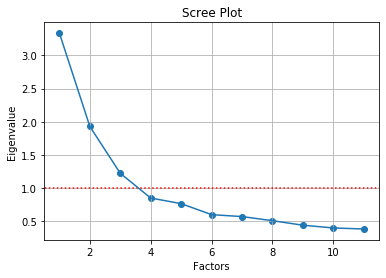

In [16]:
plt.scatter(range(1,12),ev) # range should equal the number of features in the data set, here there are 11
plt.plot(range(1,12),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.hlines(y = 1, xmin = 0, xmax = 12, colors = "red", linestyle = "dotted") # eigenvalue cut off of 1
plt.xlim(left = 0.5, right = 11.5)
plt.grid()
plt.show()

Based on the plot above, only three factors have an Eigenvalue of at least 1. Fit the data again, this time changing the number of factors to 3. In addition to fitting the data, the cell below will also extract the eigenvalues for each factor and generate the loadings matrix.

In [17]:
# fit data with 3 factors
fact = fa.FactorAnalyzer(n_factors = 3, rotation = "varimax")
fact.fit(values_std)

# calculate eigenvalues for each factor
ev = fact.get_eigenvalues()[0]
print("eigenvalues: ", ev)

# calculate cummulative variance
variance = fact.get_factor_variance()[1] # index 1 just gives the cummulative variance for each factor
print("explained variance: ",variance)

# calculate loadings matrix for each factor and feature
loadings = fact.loadings_
# create a dataframe and label the index with the columns from the original data set
loadings_matrix = pd.DataFrame(data = loadings, columns = ['F1', 'F2', 'F3'], index=values.columns[:])
loadings_matrix

eigenvalues:  [3.33630887 1.92854707 1.22243771 0.849645   0.76508625 0.59908654
 0.56991865 0.50794784 0.4398629  0.39852826 0.38263091]
explained variance:  [0.18491363 0.14483362 0.11374179]


,F1,F2,F3
Trustworthy,0.606707,0.368039,-0.095908
Friendly,0.750880,0.078162,0.093147
Agreeable,0.755232,0.118416,-0.058392
Wealthy,0.077239,0.420910,0.261221
Educated,0.221101,0.491307,0.132247
Local,0.028913,0.001402,-0.678808
Urban,-0.012932,0.326347,0.524129
Feminine_voice,-0.020038,0.001072,0.553927
Language_mastery,0.161499,0.693886,-0.255318
Pleasant_voice,0.614002,0.355578,-0.075505


In order to determine which features are reported as associated with which factors, the following rule of thumb is used:

- A loading value of |>0.4| indicates that a variable 'belongs' to the factor and is reported.
- A loading value of |<0.1| indicates that a variable does not 'belong' to the factor and may be omitted from the report.

Accordingly, `Factor 1` is associated with: **Trustworthy, Friendly, Agreeable, Pleasant voice**; `Factor 2` is associated with: **Wealthy, Educated, Mastery of language, Refined accent**; `Factor 3` is associated with: **(-)Local, Urban, Feminine**.

Using domain knowledge and prior literature, the factors can then be labeled (perhaps as Solidarity, Power, and Metropolitanism) and analyzed/submitted to regression models. Below is an example of how a table of factor loadings might be compiled in a paper:

<img src="figures/efa_table.png" width="400">

In order to transform the entire data set according to these three factors, the following code should be run:

In [18]:
transformed_data = fact.transform(values_std)
new_data = pd.DataFrame(data = transformed_data, columns = ['Solidarity', 'Power', 'Metropolitanism'])
new_data.head()

,Solidarity,Power,Metropolitanism
0,-1.104709,-0.522754,-0.149930
1,0.248581,-0.989599,0.044476
2,0.105088,-1.076647,-0.268147
3,-0.455948,-0.312721,0.605642
4,-0.666034,0.717471,-0.077341


In [19]:
guise_new = guise.join(new_data)
guise_new.head()

,GuiseLanguage,GuiseGender,Participant,ListenerGender,Trustworthy,Friendly,Agreeable,Wealthy,Educated,Local,Urban,Feminine_voice,Language_mastery,Pleasant_voice,Refined_accent,Solidarity,Power,Metropolitanism
0,Genoese,Female,s1,Male,3,3,3,4,3,7,5,7,5,5,3,-1.104709,-0.522754,-0.149930
1,Genoese,Female,s2,Male,5,5,6,4,1,4,4,4,5,4,4,0.248581,-0.989599,0.044476
2,Genoese,Female,s3,Male,4,5,5,4,4,7,2,7,4,5,4,0.105088,-1.076647,-0.268147
3,Genoese,Female,s4,Female,5,4,4,5,5,5,5,7,4,4,5,-0.455948,-0.312721,0.605642
4,Genoese,Female,s5,Female,6,3,3,4,6,6,4,7,6,6,7,-0.666034,0.717471,-0.077341


For more examples of linguistic applications of exploratory factor analysis, see [D'Onofrio (2019)](https://onlinelibrary.wiley.com/doi/abs/10.1111/josl.12368) and [Weatherholtz et al. (2014)](https://www.cambridge.org/core/journals/language-variation-and-change/article/sociallymediated-syntactic-alignment/08A99AE8BA59E60F5ACBB6FECB49DB48).

---
### References
Birdsong, D., Gertken, L. M., & Amengual, M. (2012). Bilingual language profile: An easy-to-use instrument to assess bilingualism. *COERLL, University of Texas at Austin*.

Castro-Schilo, L. (2017). Principal components or factor analysis? https://community.jmp.com/t5/JMP-Blog/Principal-components-or-factor-analysis/ba-p/38347.

D'Onofrio, A. (2019). Complicating categories: Personae mediate racialized expectations of non‐native speech. *Journal of Sociolinguistics*, 23(4), 346-366.

Gaskin, J. (2014). Exploratory Factor Analysis (conceptual). https://www.youtube.com/watch?v=Q2JBLuQDUvI.

Licata, Gabriella. (forthcoming). Language Attitudes in Liguria: Effects of Gender on the Perception of Genoese. *Proceedings from 49th Linguistic Symposium on Romance Languages*. University of Georgia.

Rysiewicz, J. (2008). Cognitive profiles of (un) successful FL learners: A cluster analytical study. *The Modern Language Journal*, 92(1), 87-99.

Sandoval, S., Berisha, V., Utianski, R. L., Liss, J. M., & Spanias, A. (2013). Automatic assessment of vowel space area. *The Journal of the Acoustical Society of America*, 134(5), EL477-EL483.

Sheehan, D. (2017). Clustering with SciKit with GIFs. https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/.

Weatherholtz, K., Campbell-Kibler, K., & Jaeger, T. F. (2014). Socially-mediated syntactic alignment. *Language Variation and Change*, 26(3), 387.